In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset=pd.read_csv('29-bestsellers_with_categories.csv')

In [24]:
missing_data=dataset.isnull().sum()
print("missing data:\n",missing_data)

missing data:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [25]:
# Remove duplicate rows based on the 'Name' column, keeping the first occurrence
#dataset = dataset.drop_duplicates(subset='Name', keep='first')

In [26]:
dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


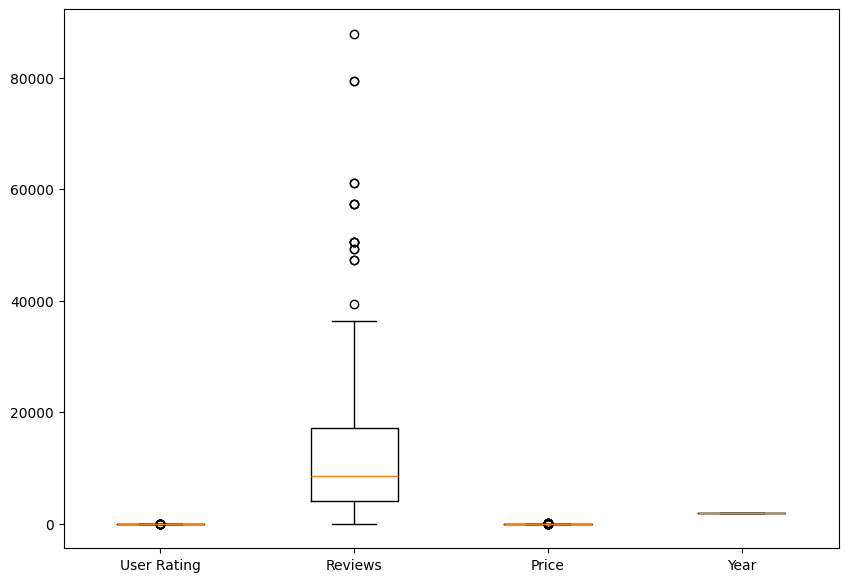

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [28]:
Q1 = dataset['Reviews'].quantile(0.25)
Q3 = dataset['Reviews'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range (IQR) for Reviews:", IQR)

Interquartile Range (IQR) for Reviews: 13195.25


In [29]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter dataset to remove outliers in 'Reviews'
filtered_dataset = dataset[(dataset['Reviews'] >= lower_bound) & (dataset['Reviews'] <= upper_bound)]
filtered_dataset.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [30]:
# Calculate IQR for 'Price'
Q1_price = dataset['Price'].quantile(0.25)
Q3_price = dataset['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Define lower and upper bounds for outliers in 'Price'
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filter dataset to remove outliers in 'Price'
filtered_dataset_price = dataset[(dataset['Price'] >= lower_bound_price) & (dataset['Price'] <= upper_bound_price)]
filtered_dataset_price.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


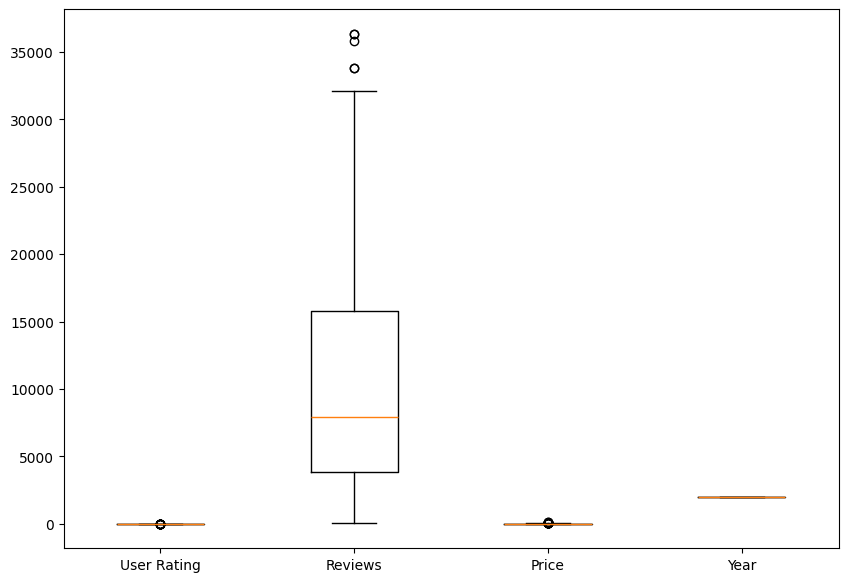

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

numeric_data = filtered_dataset.select_dtypes(include=np.number)
plt.figure(figsize=(10, 7))
plt.boxplot([numeric_data[col] for col in numeric_data.columns], tick_labels=numeric_data.columns)
plt.show()

In [32]:
missing_data=filtered_dataset.isnull().sum()
print("missing data:\n",missing_data)
filtered_dataset.head()

missing data:
 Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [33]:
import category_encoders as ce

# Select columns to encode and the target
cols_to_encode = ['Author']
target = 'User Rating'

# Make sure we have a copy, not a view, of the dataset
filtered_dataset = filtered_dataset.copy()

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols=cols_to_encode)

# Fit and transform the filtered_dataset
filtered_dataset[cols_to_encode] = encoder.fit_transform(filtered_dataset[cols_to_encode], filtered_dataset[target])

# Ensure the encoded columns are float64
for col in cols_to_encode:
    filtered_dataset[col] = filtered_dataset[col].astype('float64')

print("Filtered dataset after encoding:")
print(filtered_dataset.head())

Filtered dataset after encoding:
                                                Name    Author  User Rating  \
0                      10-Day Green Smoothie Cleanse  4.634228          4.7   
1                                  11/22/63: A Novel  4.607695          4.6   
2            12 Rules for Life: An Antidote to Chaos  4.634228          4.7   
3                             1984 (Signet Classics)  4.634228          4.7   
4  5,000 Awesome Facts (About Everything!) (Natio...  4.647239          4.8   

   Reviews  Price  Year        Genre  
0    17350      8  2016  Non Fiction  
1     2052     22  2011      Fiction  
2    18979     15  2018  Non Fiction  
3    21424      6  2017      Fiction  
4     7665     12  2019  Non Fiction  


In [34]:
# Frequency encode the 'Name' column in filtered_dataset (overwrite the original column)
name_freq = filtered_dataset['Name'].value_counts(normalize=True)
filtered_dataset['Name'] = filtered_dataset['Name'].map(name_freq)

print(filtered_dataset['Name'].head())

0    0.001876
1    0.001876
2    0.001876
3    0.001876
4    0.001876
Name: Name, dtype: float64


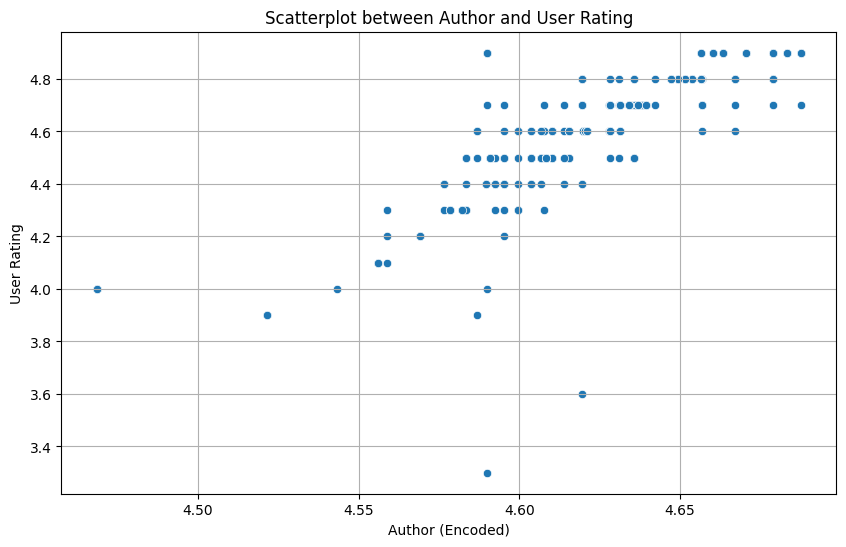

In [35]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_dataset['Author'], y=filtered_dataset['User Rating'])
plt.xlabel('Author (Encoded)')
plt.ylabel('User Rating')
plt.title('Scatterplot between Author and User Rating')
plt.grid(True)
plt.show()

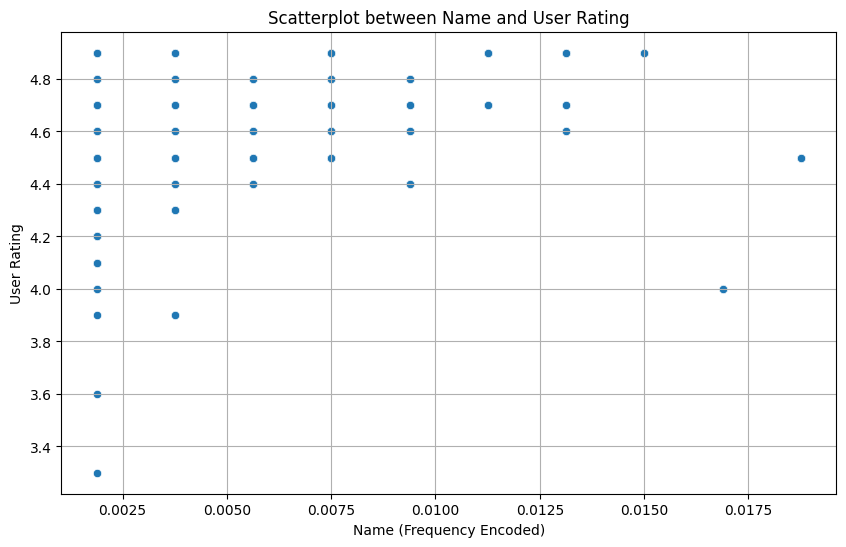

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=filtered_dataset['Name'], y=filtered_dataset['User Rating'])
plt.xlabel('Name (Frequency Encoded)')
plt.ylabel('User Rating')
plt.title('Scatterplot between Name and User Rating')
plt.grid(True)
plt.show()

In [37]:
print(filtered_dataset.dtypes)
print(dataset.dtypes)

Name           float64
Author         float64
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object
Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object


In [38]:
is_author_numeric = pd.api.types.is_numeric_dtype(filtered_dataset['Author'])
print(f"Is 'Author' column numeric? {is_author_numeric}")

Is 'Author' column numeric? True


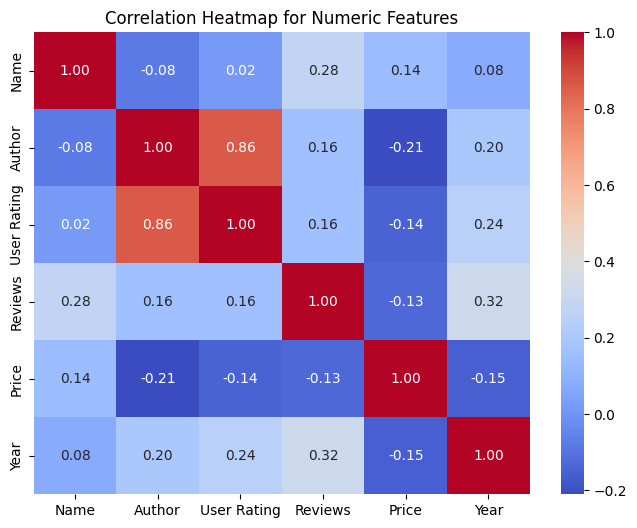

In [39]:
import seaborn as sns

# Compute the correlation matrix
corr = filtered_dataset.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

In [40]:
x=filtered_dataset.iloc[:,[0,1,3,4,5,6]].values
print(x)

[[0.001876172607879925 4.6342277139152515 17350 8 2016 'Non Fiction']
 [0.001876172607879925 4.607694510229774 2052 22 2011 'Fiction']
 [0.001876172607879925 4.6342277139152515 18979 15 2018 'Non Fiction']
 ...
 [0.0075046904315197 4.637091292831338 14331 8 2017 'Non Fiction']
 [0.0075046904315197 4.637091292831338 14331 8 2018 'Non Fiction']
 [0.0075046904315197 4.637091292831338 14331 8 2019 'Non Fiction']]


In [41]:
y=filtered_dataset.iloc[:,[2]].values
print(y)

[[4.7]
 [4.6]
 [4.7]
 [4.7]
 [4.8]
 [4.4]
 [4.7]
 [4.7]
 [4.7]
 [4.6]
 [4.6]
 [4.6]
 [4.6]
 [4.5]
 [4.6]
 [4.5]
 [4.6]
 [4.4]
 [4.5]
 [4.8]
 [4.6]
 [4.6]
 [3.9]
 [4.6]
 [4.3]
 [4.6]
 [4.7]
 [4.2]
 [4.6]
 [4.6]
 [4.8]
 [4.7]
 [4.8]
 [4.7]
 [4.7]
 [4.7]
 [4.6]
 [4.5]
 [4.9]
 [4.9]
 [4.8]
 [4.6]
 [4.8]
 [4.5]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.3]
 [4.8]
 [4.8]
 [4.6]
 [4.6]
 [4.8]
 [4.4]
 [4.6]
 [4.3]
 [4.2]
 [4.8]
 [4.8]
 [4.8]
 [4.8]
 [4.6]
 [4.6]
 [4.5]
 [4.5]
 [4.8]
 [4.8]
 [4.8]
 [4.6]
 [4.6]
 [4.6]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [4.9]
 [4.9]
 [4.9]
 [4.9]
 [4.9]
 [4.9]
 [4.8]
 [4.6]
 [4.5]
 [4.5]
 [4.3]
 [4.5]
 [4.5]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.6]
 [4.6]
 [4.7]
 [4.4]
 [4.4]
 [4.5]
 [4.5]
 [4.2]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.7]
 [4.4]
 [4.7]
 [4.4]
 [4.6]
 [4.6]
 [4.6]
 [4.5]
 [4.6]
 [4.8]
 [4.8]
 [4.8]
 [4.8]
 [4.8]
 [4.6]
 [4.6]
 [4.6]
 [4.6]
 [3.6]
 [4.8]
 [4.6]
 [4.6]
 [4.5]
 [4.5]
 [4.5]
 [4.5]
 [4.8]
 [4.8]
 [4.8]
 [4.9]
 [4.9]
 [4.6]
 [4.4]

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 0.001876172607879925 ... 17350 8 2016]
 [1.0 0.0 0.001876172607879925 ... 2052 22 2011]
 [0.0 1.0 0.001876172607879925 ... 18979 15 2018]
 ...
 [0.0 1.0 0.0075046904315197 ... 14331 8 2017]
 [0.0 1.0 0.0075046904315197 ... 14331 8 2018]
 [0.0 1.0 0.0075046904315197 ... 14331 8 2019]]


avoid dummy variable

In [43]:
x= x[: , 1:]
print(x)

[[1.0 0.001876172607879925 4.6342277139152515 17350 8 2016]
 [0.0 0.001876172607879925 4.607694510229774 2052 22 2011]
 [1.0 0.001876172607879925 4.6342277139152515 18979 15 2018]
 ...
 [1.0 0.0075046904315197 4.637091292831338 14331 8 2017]
 [1.0 0.0075046904315197 4.637091292831338 14331 8 2018]
 [1.0 0.0075046904315197 4.637091292831338 14331 8 2019]]


In [44]:
from sklearn.preprocessing import StandardScaler

# Standard scale all columns of x except the first two columns
scaler = StandardScaler()
x[:, 3:] = scaler.fit_transform(x[:, 3:])
print(x)

[[1.0 0.001876172607879925 4.6342277139152515 0.8261729686956145
  -0.4686665998949052 0.6349618947091885]
 [0.0 0.001876172607879925 4.607694510229774 -1.02017071359769
  0.8053553193822468 -0.9347722884076445]
 [1.0 0.001876172607879925 4.6342277139152515 1.022779966895104
  0.1683443597436708 1.2628555679559217]
 ...
 [1.0 0.0075046904315197 4.637091292831338 0.46180432071264377
  -0.4686665998949052 0.948908731332555]
 [1.0 0.0075046904315197 4.637091292831338 0.46180432071264377
  -0.4686665998949052 1.2628555679559217]
 [1.0 0.0075046904315197 4.637091292831338 0.46180432071264377
  -0.4686665998949052 1.5768024045792883]]


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=1)

In [46]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values for the test set
y_pred = regressor.predict(x_test)

# Calculate the R^2 score (accuracy for regression)
accuracy = r2_score(y_test, y_pred)
print("R^2 Score (Accuracy):", accuracy)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score (Accuracy): 0.6952961759136332
Mean Absolute Error: 0.0690
Mean Squared Error: 0.0170


In [48]:
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    median_absolute_error,
    explained_variance_score
)

# Predict on the test set to match y_test
y_pred_test = regressor.predict(x_test)

print(f"R² Score: {r2_score(y_test, y_pred_test):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.4f}")
# Compute RMSE manually for compatibility
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Log Error: {mean_squared_log_error(y_test, y_pred_test):.4f}")
print(f"Median Absolute Error: {median_absolute_error(y_test, y_pred_test):.4f}")
print(f"Explained Variance Score: {explained_variance_score(y_test, y_pred_test):.4f}")

R² Score: 0.6953
Mean Absolute Error: 0.0690
Mean Squared Error: 0.0170
Root Mean Squared Error: 0.1304
Mean Squared Log Error: 0.0006
Median Absolute Error: 0.0414
Explained Variance Score: 0.6988


In [49]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validated R²: 0.7223 ± 0.0957


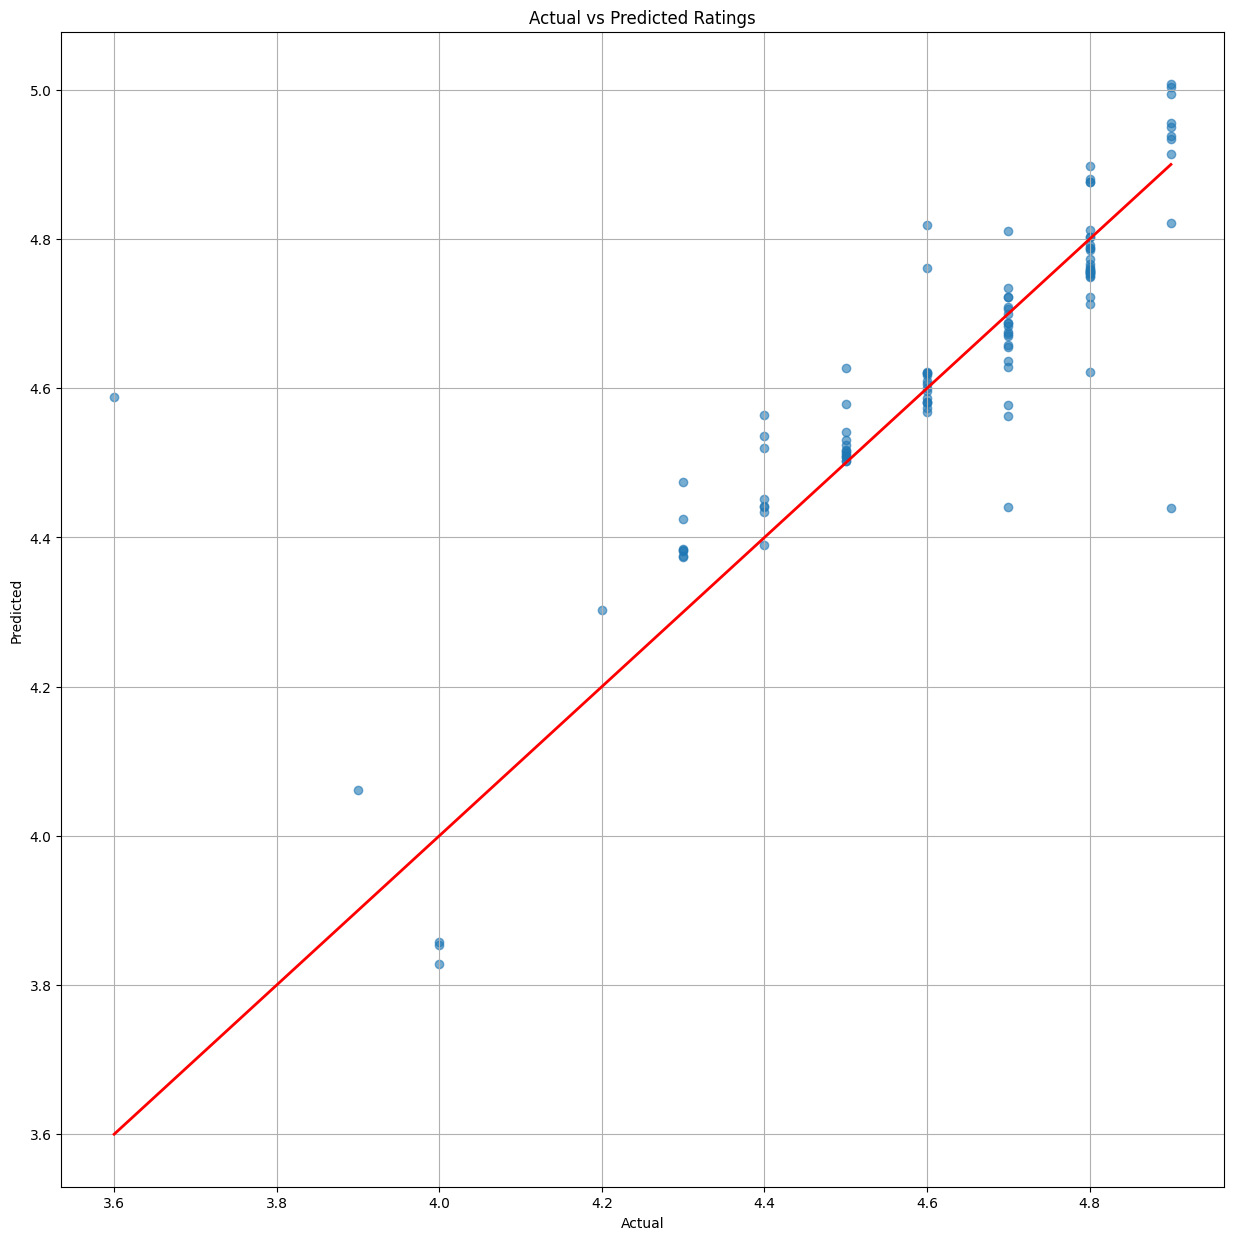

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Ratings')
plt.grid(True)
plt.show()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target values for the test set
y_pred = regressor.predict(x_train)

# Calculate the R^2 score (accuracy for regression)
accuracy = r2_score(y_train, y_pred)
print("R^2 Score (Accuracy):", accuracy)
mae = mean_absolute_error(y_train, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

R^2 Score (Accuracy): 0.775335631194414
Mean Absolute Error: 0.0592
Mean Squared Error: 0.0101


In [52]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(regressor, x, y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validated R²: 0.7223 ± 0.0957


In [53]:
print("Shape of x:", x.shape)

Shape of x: (533, 6)


In [54]:
ones=np.ones((533,1)).astype(int)
x=np.append(ones,x,axis=1)

In [55]:
print(x)

[[1 1.0 0.001876172607879925 ... 0.8261729686956145 -0.4686665998949052
  0.6349618947091885]
 [1 0.0 0.001876172607879925 ... -1.02017071359769 0.8053553193822468
  -0.9347722884076445]
 [1 1.0 0.001876172607879925 ... 1.022779966895104 0.1683443597436708
  1.2628555679559217]
 ...
 [1 1.0 0.0075046904315197 ... 0.46180432071264377 -0.4686665998949052
  0.948908731332555]
 [1 1.0 0.0075046904315197 ... 0.46180432071264377 -0.4686665998949052
  1.2628555679559217]
 [1 1.0 0.0075046904315197 ... 0.46180432071264377 -0.4686665998949052
  1.5768024045792883]]


In [56]:
x_opt=x[:,:]
x_opt=x_opt.astype(np.float64)
print(x_opt)

[[ 1.          1.          0.00187617 ...  0.82617297 -0.4686666
   0.63496189]
 [ 1.          0.          0.00187617 ... -1.02017071  0.80535532
  -0.93477229]
 [ 1.          1.          0.00187617 ...  1.02277997  0.16834436
   1.26285557]
 ...
 [ 1.          1.          0.00750469 ...  0.46180432 -0.4686666
   0.94890873]
 [ 1.          1.          0.00750469 ...  0.46180432 -0.4686666
   1.26285557]
 [ 1.          1.          0.00750469 ...  0.46180432 -0.4686666
   1.5768024 ]]


In [57]:
import statsmodels.api as sm
regressor_OLS=sm.OLS(y,x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sat, 05 Jul 2025   Prob (F-statistic):          4.49e-158
Time:                        01:40:32   Log-Likelihood:                 435.81
No. Observations:                 533   AIC:                            -857.6
Df Residuals:                     526   BIC:                            -827.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.4731      0.638    -30.524      0.000     -20.726     -18.220
x1             0.0068      0.010      0.656      0.512      -0.013       0.027
x2             4.2992      1.213      3.545      0.000       1.916       6.682
x3             5.2042      0.138     37.826      0.000       4.934       5.474
x4            -0.0038      0.005     -0.706      0.481      -0.015       0.007
x5             0.0070      0.005      1.433      0.152      -0.003       0.017
x6             0.0163      0.005      3.205      0.001       0.006       0.026
==============================================================================
Omnibus:                      465.796   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30749.913
Skew:                          -3.384   Prob(JB):                         0.00
Kurtosis:                      39.590   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in x_opt (excluding the intercept column)
vif_data = []
for i in range(1, x_opt.shape[1]):  # skip the intercept at index 0
    vif = variance_inflation_factor(x_opt, i)
    vif_data.append((i, vif))

print("Variance Inflation Factors (VIF):")
for idx, vif in vif_data:
    print(f"Feature {idx}: VIF = {vif:.2f}")

Variance Inflation Factors (VIF):
Feature 1: VIF = 1.20
Feature 2: VIF = 1.17
Feature 3: VIF = 1.14
Feature 4: VIF = 1.36
Feature 5: VIF = 1.11
Feature 6: VIF = 1.19


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(x_test)

# Evaluate the model
print(f"Decision Tree R² Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.4f}")

Decision Tree R² Score: 0.7319
Decision Tree MAE: 0.0411
Decision Tree MSE: 0.0150


In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=1)
dt_regressor.fit(x_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(x_test)

# Evaluate the model
print(f"Decision Tree R² Score: {r2_score(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MAE: {mean_absolute_error(y_test, y_pred_dt):.4f}")
print(f"Decision Tree MSE: {mean_squared_error(y_test, y_pred_dt):.4f}")

Decision Tree R² Score: 0.7319
Decision Tree MAE: 0.0411
Decision Tree MSE: 0.0150


In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train a Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=1)
gb_regressor.fit(x_train, y_train.ravel())  # Flatten y_train to 1D

# Predict on the test set
y_pred_gb = gb_regressor.predict(x_test)

# Evaluate the model
print(f"Gradient Boosting R² Score: {r2_score(y_test, y_pred_gb):.4f}")
print(f"Gradient Boosting MAE: {mean_absolute_error(y_test, y_pred_gb):.4f}")
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gb):.4f}")

Gradient Boosting R² Score: 0.7666
Gradient Boosting MAE: 0.0410
Gradient Boosting MSE: 0.0130


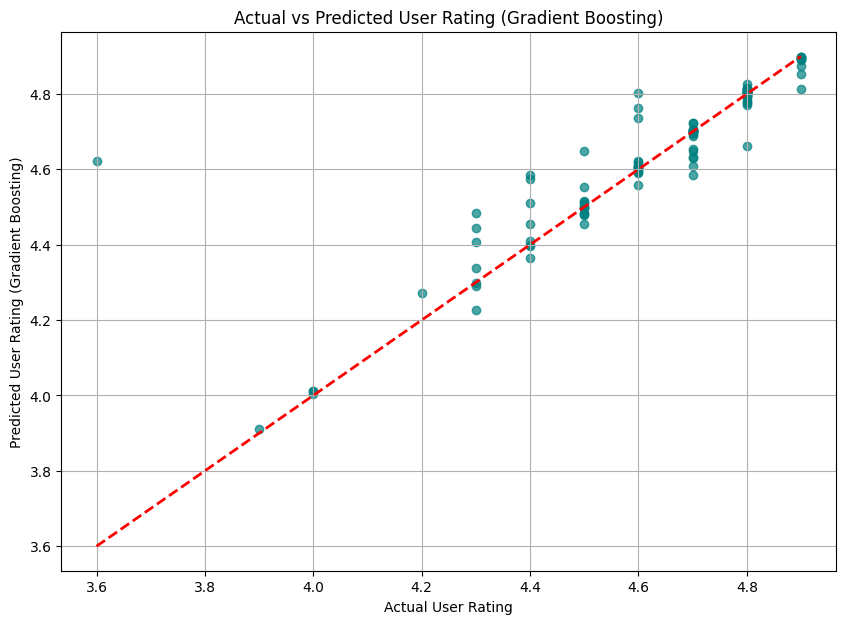

In [62]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_gb, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual User Rating')
plt.ylabel('Predicted User Rating (Gradient Boosting)')
plt.title('Actual vs Predicted User Rating (Gradient Boosting)')
plt.grid(True)
plt.show()

In [63]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for the Gradient Boosting Regressor
cv_scores_gb = cross_val_score(gb_regressor, x, y.ravel(), cv=5, scoring='r2')
print(f"Gradient Boosting Cross-Validated R²: {cv_scores_gb.mean():.4f} ± {cv_scores_gb.std():.4f}")

Gradient Boosting Cross-Validated R²: 0.6920 ± 0.1059


In [64]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train an XGBoost Regressor
xgb_regressor = XGBRegressor(random_state=1, n_estimators=100)
xgb_regressor.fit(x_train, y_train.ravel())

# Predict on the test set
y_pred_xgb = xgb_regressor.predict(x_test)

# Evaluate the XGBoost model
print(f"XGBoost R² Score: {r2_score(y_test, y_pred_xgb):.4f}")
print(f"XGBoost MAE: {mean_absolute_error(y_test, y_pred_xgb):.4f}")
print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb):.4f}")

XGBoost R² Score: 0.7429
XGBoost MAE: 0.0427
XGBoost MSE: 0.0143


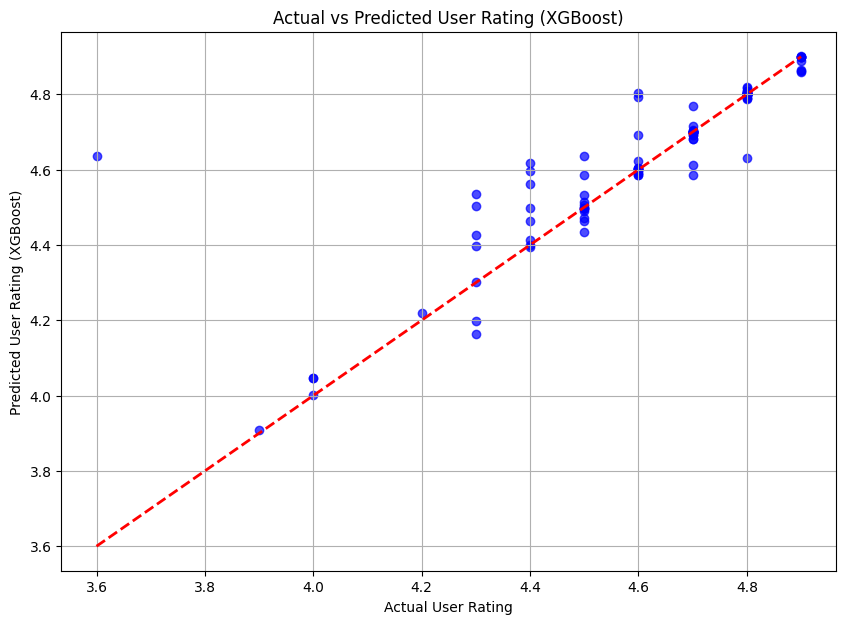

In [65]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual User Rating')
plt.ylabel('Predicted User Rating (XGBoost)')
plt.title('Actual vs Predicted User Rating (XGBoost)')
plt.grid(True)
plt.show()

In [66]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation for the XGBoost Regressor
cv_scores_xgb = cross_val_score(xgb_regressor, x, y.ravel(), cv=5, scoring='r2')
print(f"XGBoost Cross-Validated R²: {cv_scores_xgb.mean():.4f} ± {cv_scores_xgb.std():.4f}")

XGBoost Cross-Validated R²: 0.6006 ± 0.2059


In [67]:
from sklearn.linear_model import BayesianRidge

# Train a Bayesian Ridge Regression model
bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(x_train, y_train.ravel())

# Predict on the test set
y_pred_bayes = bayesian_regressor.predict(x_test)

# Evaluate the Bayesian Ridge Regression model
print(f"Bayesian Ridge R² Score: {r2_score(y_test, y_pred_bayes):.4f}")
print(f"Bayesian Ridge MAE: {mean_absolute_error(y_test, y_pred_bayes):.4f}")
print(f"Bayesian Ridge MSE: {mean_squared_error(y_test, y_pred_bayes):.4f}")

Bayesian Ridge R² Score: 0.6945
Bayesian Ridge MAE: 0.0685
Bayesian Ridge MSE: 0.0170


In [68]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Use degree 2 for polynomial regression as a common starting point
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Fit the polynomial regression model
poly_regressor = LinearRegression()
poly_regressor.fit(x_train_poly, y_train)

# Predict on the test set
y_pred_poly = poly_regressor.predict(x_test_poly)

# Evaluate the model
print(f"Polynomial Regression R² Score: {r2_score(y_test, y_pred_poly):.4f}")
print(f"Polynomial Regression MAE: {mean_absolute_error(y_test, y_pred_poly):.4f}")
print(f"Polynomial Regression MSE: {mean_squared_error(y_test, y_pred_poly):.4f}")

Polynomial Regression R² Score: 0.7402
Polynomial Regression MAE: 0.0465
Polynomial Regression MSE: 0.0145


In [69]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=1, n_estimators=100)
rf_regressor.fit(x_train, y_train.ravel())

# Predict on the test set
y_pred_rf = rf_regressor.predict(x_test)

# Evaluate the Random Forest model
print(f"Random Forest R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.4f}")
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")

Random Forest R² Score: 0.7502
Random Forest MAE: 0.0391
Random Forest MSE: 0.0139
